In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import os

##########################################################################
## fonction d'autocorrélation (l'équation 33 du cours avec h=0, page 19)
def TM_ACF(data,lag=1):
    data=numpy.array(data,dtype=numpy.float64)
    m=numpy.mean(data)
    T=len(data)
    V=sum([(data[t]-m)**2 for t in range(T)])
    #print("m=%s \t v=%s"%(m,V))
    C=sum([(data[t]-m)*(data[t+lag]-m) for t in range(T-lag)])
    R=C/(1.0*V)
    return R


In [12]:
def initial_Mp(data,p):
    Mp= numpy.empty([p, p]) # 3-lignes , 2-cols
    Bp= numpy.zeros(p)
    for i in range(0,p):
        #Mp[i,i]=sum([data[t-i]**2 for t in range(p,len(data))])
        Bp[i]=  sum([data[t]*data[t-i-1] for t in range(p,len(data))])
    for i in range(0,p):
        for j in range(0,p):
            Mp[i,j]= sum([data[t-i-1]*data[t-j-1] for t in range(p,len(data))])
   
    Sol = numpy.linalg.solve(Mp, Bp) 
    
    Y =[]
    T=len(data)
    for t in range(p,T):
        Y.append(numpy.sum([Sol[k-1]*data[t-k] for k in range(1,p+1)]))
    
    plt.plot(Y,':r')
    plt.plot(data[p:])
    plt.show()
    return Sol
    #return Mp
    
    

In [45]:
def ARp_simul(T,coeff,sigma=1.54):
    p=len(coeff)
    e=numpy.random.normal(0,sigma,T)
    data=[0]*T
    data[0]=e[0]
    for t in range(1,T):
        if t<p:
            data[t]=numpy.sum([coeff[k]*data[t-k-1] for k in range(t)])+e[t]
        else :
            data[t]=numpy.sum([coeff[k-1]*data[t-k] for k in range(1,p+1)])+e[t]
        #if t < p:
        #   data[t]=numpy.sum([coeff[k]*data[t-k] for k in range(t)])+e[t]
        #else :
        #data[t]=numpy.sum([coeff[k-1]*data[t-p+k] for k in range(1,p+1)])+e[t]
    return data





In [46]:
X = ARp_simul(100,[0.258,-0.858,0.12,0.11])



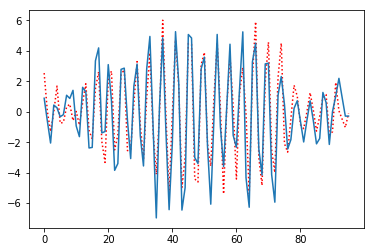

array([ 0.33459849, -0.70414344,  0.19095685,  0.23447946])

In [47]:
initial_Mp(X,4)

-1.7206313615644386
-0.6483588286715682
2.5094997494506255


1
2
3
4


1